[10, 12, 5, 10, 9, 13, 18, 6, 0, 14, 15, 7, 15, 10, 14, 8, 8, 11, 15, 0, 14, 16, 16, 6, 0, 19, 11, 12, 17, 10, 8, 10, 15, 13, 8, 5, 0, 15, 14, 8, 5, 11, 14, 9, 15, 10, 11, 13, 13, 16, 13, 15, 12, 10, 6, 12, 11, 0, 16, 17, 14, 10, 10, 6, 9, 17, 8, 10, 9, 15, 6, 10, 15, 19, 12, 6, 9, 15, 5]
[ 8.0448818  12.88012032  2.80670673  8.19287345  8.44781834 12.88012032
 19.73004156  6.43313563  4.01551636 12.88012032 15.29773958  6.03019908
 14.08892995 10.61049271 14.63985814  8.19287345  6.58112727 10.8654376
 15.84866777  4.9693811  14.49186649 15.84866777 15.44573123  4.16350801
  4.01551636 19.87803321 10.61049271  9.40168308 17.71535884 10.20755617
  7.64194526  7.78993691 15.70067613 12.88012032  6.43313563  3.76057147
 -0.81972216 15.29773958 12.62517543  6.83607217  5.224326    9.65662797
 14.49186649  8.44781834 16.25160432 10.05956452 11.26837415 14.49186649
 12.07424723 16.65454086 13.68599341 15.29773958 10.46250106  8.19287345
  4.41845291 11.67131069 10.61049271  2.80670673 15.84

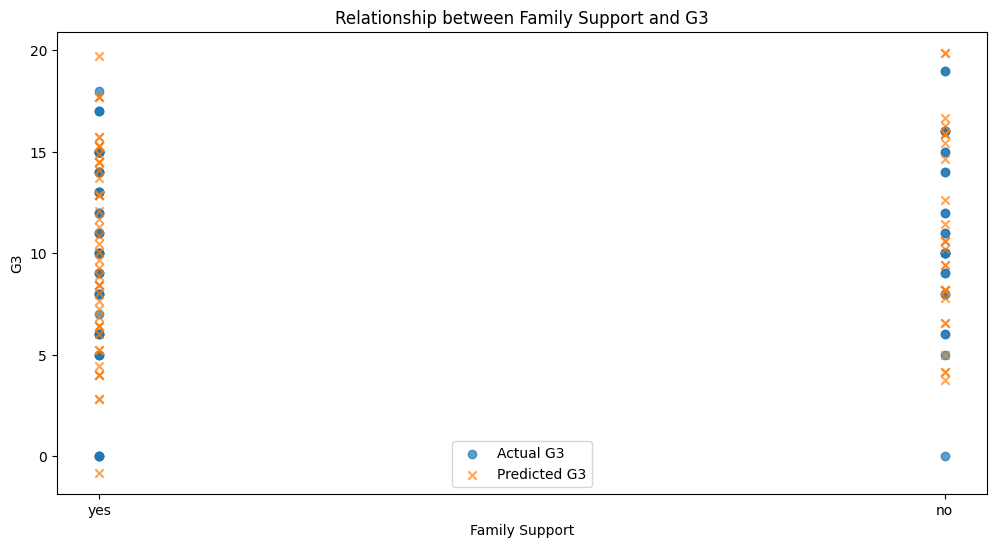

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['famsup', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'famsup'
data = pd.get_dummies(data, columns=['famsup'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'famsup_yes']]
y = data['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'famsup' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'Family Support': df.loc[X_test.index, 'famsup'], 'Mean G': X_test['mean_G'], 'Actual G3': y_test.values, 'Predicted G3': y_pred})

# Plot the relationship between 'famsup' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['Family Support'], plot_data['Actual G3'], label='Actual G3', alpha=0.7)
plt.scatter(plot_data['Family Support'], plot_data['Predicted G3'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('Family Support')
plt.ylabel('G3')
plt.title('Relationship between Family Support and G3')
plt.legend()
plt.show()
